In [17]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
xchange_data = pd.read_csv('/Users/lacivert/6/EURUSD.csv')

df = pd.DataFrame(xchange_data)

In [19]:
df['price'] = pd.to_numeric(df.EURUSD, errors='coerce')

In [20]:
list(df.columns.values)

['DATE', 'EURUSD', 'price']

In [21]:
# Clean up missing values 
df.dropna(how='any', inplace=True)

In [22]:
# Descriptive Statistics
df.describe()

,EURUSD,price
count,5000.000000,5000.000000
mean,1.207217,1.207217
std,0.169220,0.169220
min,0.827000,0.827000
25%,1.091500,1.091500
50%,1.226800,1.226800
75%,1.332425,1.332425
max,1.601000,1.601000


In [23]:
df.head(3)

,DATE,EURUSD,price
0,1/4/99,1.1812,1.1812
1,1/5/99,1.1760,1.1760
2,1/6/99,1.1636,1.1636


In [24]:
df.tail(3)

,DATE,EURUSD,price
4997,11/21/18,1.1393,1.1393
4998,11/23/18,1.1332,1.1332
4999,11/26/18,1.1346,1.1346


In [25]:
EURUSD = df.loc[:,'EURUSD']

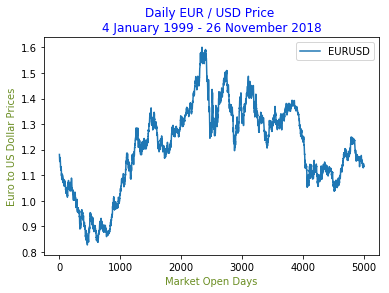

In [26]:
plt.plot (EURUSD)
plt.xlabel ('Market Open Days', color='olivedrab')
plt.ylabel ('Euro to US Dollar Prices', color='olivedrab')
plt.title ('Daily EUR / USD Price \n4 January 1999 - 26 November 2018', color='blue')
plt.legend()

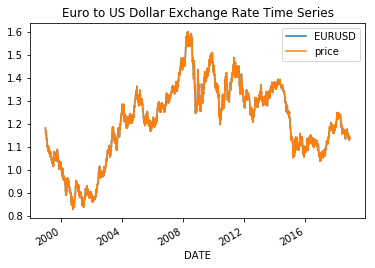

In [27]:
df.index = pd.to_datetime(df.DATE)
df.plot()
plt.title('Euro to US Dollar Exchange Rate Time Series')
plt.show()

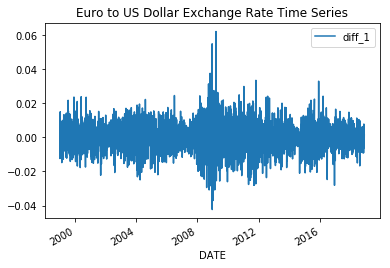

In [28]:
df['diff_1'] = df.price - df.price.shift()
df.plot(y='diff_1')
plt.title('Euro to US Dollar Exchange Rate Time Series')
plt.show()

Text(0.5,1,'Euro to US DOllar PACF')

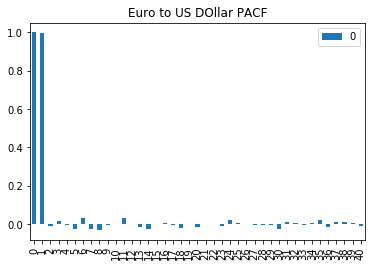

In [29]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.price))
x_acf.plot(kind='bar')
plt.title("Euro to US DOllar PACF")

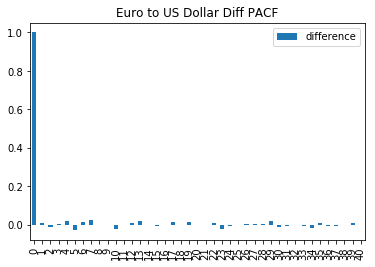

In [30]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Euro to US Dollar Diff PACF")
plt.legend(['difference'])

In [31]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/lacivert/anaconda3/lib/python3.7/site-package

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 4999
Model:                 ARIMA(0, 1, 0)   Log Likelihood               17351.395
Method:                           css   S.D. of innovations              0.008
Date:                Tue, 27 Nov 2018   AIC                         -34698.790
Time:                        22:26:46   BIC                         -34685.756
Sample:                             1   HQIC                        -34694.222
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.322e-06      0.000     -0.088      0.930      -0.000       0.000
Residuals Description
count    4.999000e+03
mean     8.485749e-11
std      7.522839e-03
min     -4.229068e-02
25%     -3.990678e-03

In [32]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/lacivert/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an erro

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 5000
Model:                     ARMA(1, 0)   Log Likelihood               17353.479
Method:                       css-mle   S.D. of innovations              0.008
Date:                Tue, 27 Nov 2018   AIC                         -34700.958
Time:                        22:27:48   BIC                         -34681.407
Sample:                             0   HQIC                        -34694.106
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1944      0.080     14.867      0.000       1.037       1.352
ar.L1.price     0.9989      0.001   1706.581      0.000       0.998       1.000
                                    Roots       

In [33]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 5000
Model:                     ARMA(1, 1)   Log Likelihood               17353.640
Method:                       css-mle   S.D. of innovations              0.008
Date:                Tue, 27 Nov 2018   AIC                         -34699.280
Time:                        22:28:19   BIC                         -34673.211
Sample:                             0   HQIC                        -34690.143
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1946      0.080     14.934      0.000       1.038       1.351
ar.L1.price     0.9988      0.001   1689.383      0.000       0.998       1.000
ma.L1.price     0.0081      0.014      0.568    

In [34]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(df.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [35]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lacivert/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [36]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

NameError: name 'model_111_fit' is not defined